<a href="https://colab.research.google.com/github/hkafrawi/ML_Course/blob/master/Frozen_Lake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import gym
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
env = gym.make('FrozenLake-v1',render_mode="human")

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [3]:
env.reset()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0

In [6]:
env.observation_space

Discrete(16)

In [7]:
env.action_space

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Discrete(4)

In [8]:
#state 0 action 1
env.P[0][1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0.3333333333333333, 0, 0.0, False),
 (0.3333333333333333, 4, 0.0, False),
 (0.3333333333333333, 1, 0.0, False)]

P(0|0,1) = 0.333

P(4|0,1) = 0.333

P(1|0,1) = 0.333

In [9]:
# 0.9 has been chosen as the gama (discount factor)
gama = 0.9

In [10]:
#initialize value function vector
ValueFunctionVector=np.zeros(env.observation_space.n)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
maxIterations = 1000

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
Tolerance = 10**(-5)

In [15]:
convergence_list = []

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
for i in range(maxIterations):
  convergence_list.append(np.linalg.norm(ValueFunctionVector,2))
  ValueFunctionVectorNew = np.zeros(env.observation_space.n)
  for state in env.P:
    outerSum=0
    for action in env.P[state]:
      innersum=0
      for prob, next_state, reward, done in env.P[state][action]:
        innersum += prob*(reward + gama*ValueFunctionVector[next_state])
      outerSum+=0.25*innersum
    ValueFunctionVectorNew[state]=outerSum
  if(np.max(np.abs(ValueFunctionVectorNew-ValueFunctionVector))<Tolerance):
    ValueFunctionVector=ValueFunctionVectorNew
    print("Convergence!")
    break
  ValueFunctionVector=ValueFunctionVectorNew

Convergence!


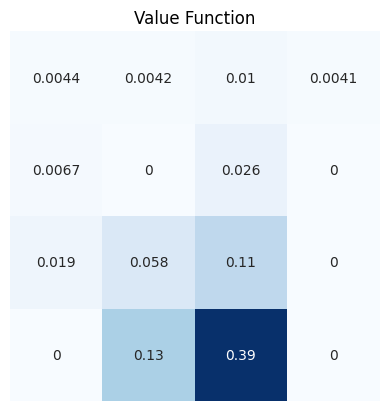

In [18]:
#Visualization
ax = sns.heatmap(ValueFunctionVector.reshape(4,4),
                 annot=True, square=True,
                 cbar=False,cmap="Blues",
                 xticklabels=False, yticklabels=False)
ax.set_title("Value Function")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


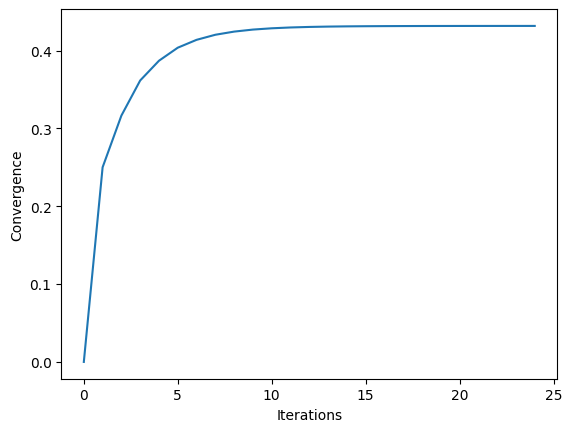

In [19]:
plt.plot(convergence_list)
plt.xlabel("Iterations")
plt.ylabel("Convergence")
plt.show()